In [107]:
from google.colab import drive , data_table

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import pandas as pd


**DATA LOADING PHASE**

In [109]:

# Define file path
file_path = '/content/drive/MyDrive/Colab Notebooks/luxury/data.xlsx'

# Load the Excel file
excel_data = pd.ExcelFile(file_path)

# Check the sheet names
print("Sheet names:", excel_data.sheet_names)

# Load data from the relevant sheets
w1_data = pd.read_excel(file_path, sheet_name='W-1')
w_data = pd.read_excel(file_path, sheet_name='W')



Sheet names: ['Instructions', 'W-1', 'W']


In [110]:

w1_data = w1_data.rename(columns={'USA (tax free)': 'USA TF'})
w_data= w_data.rename(columns={'USA (tax free)': 'USA TF'})


In [111]:
w1_data.shape

(265, 23)

In [112]:
w_data.shape

(266, 22)

**DROP IRRELEVANTS COLUMNS**

In [113]:

w1_data = w1_data.drop(columns=['URL','Category'])
w_data = w_data.drop(columns=['Category'])

In [114]:

# Find products in w1 but not in w based on SKU
w1_skus = set(w1_data['SKU'])
w_skus = set(w_data['SKU'])

products_in_w1_not_in_w =   w1_skus - w_skus

print("Products in W1 but not in W:")
print(products_in_w1_not_in_w)

#If you need more details than just the sku
products_df = w1_data[w1_data['SKU'].isin(products_in_w1_not_in_w)]
print("\nDetails of products in W1 but not in W:")
print(products_df[['SKU', 'Brand', 'Name']])

Products in W1 but not in W:
{'nvprod2010013v/M44925', 'nvprod2130165v/M45320', 'A923PL9X07-1100'}

Details of products in W1 but not in W:
                       SKU          Brand  \
134  nvprod2130165v/M45320  Louis Vuitton   
137  nvprod2010013v/M44925  Louis Vuitton   
140        A923PL9X07-1100          Loewe   

                                              Name  
134                                     OnTheGo GM  
137                                     OnTheGo GM  
140  LOEWE Luna bag in satin calfskin and jacquard  


In [115]:

# Find products in w but not in w1 based on SKU
w_skus = set(w_data['SKU'])
w1_skus = set(w1_data['SKU'])

products_in_w_not_in_w1 = w_skus - w1_skus

print("Products in W but not in W1:")
print(products_in_w_not_in_w1)

# If you need more details than just the SKU
products_df = w_data[w_data['SKU'].isin(products_in_w_not_in_w1)]
print("\nDetails of products in W but not in W1:")
print(products_df[['SKU', 'Brand', 'Name']])

Products in W but not in W1:
{'GoyardSAC MALLE MINAUDIERECoated Canvas', 'GoyardSAINT LOUISColored CanvasGM', 'GoyardPETIT FLOTColored CanvasPM', 'GoyardSAINT LOUISColored CanvasPM'}

Details of products in W but not in W1:
                                         SKU   Brand                  Name
255        GoyardSAINT LOUISColored CanvasPM  Goyard           SAINT LOUIS
256        GoyardSAINT LOUISColored CanvasGM  Goyard           SAINT LOUIS
257         GoyardPETIT FLOTColored CanvasPM  Goyard            PETIT FLOT
258  GoyardSAC MALLE MINAUDIERECoated Canvas  Goyard  SAC MALLE MINAUDIERE


In [116]:

# Remove rows from w1_data where 'SKU' is in products_in_w1_not_in_w
w1_data = w1_data[~w1_data['SKU'].isin(products_in_w1_not_in_w)]

# Remove rows from w_data where 'SKU' is in products_in_w_not_in_w1
w_data = w_data[~w_data['SKU'].isin(products_in_w_not_in_w1)]


In [117]:
w1_data.shape


(262, 21)

In [118]:
w_data.shape

(262, 21)

In [119]:

# Check for duplicates in 'SKU' column of w1_data
duplicates_w1 = w1_data[w1_data.duplicated(subset=['SKU'], keep=False)]

if duplicates_w1.empty:
    print("No duplicates found in W1 data.")
else:
    print("Duplicates found in W1 data:")
    print(duplicates_w1)

# Check for duplicates in 'SKU' column of w_data
duplicates_w = w_data[w_data.duplicated(subset=['SKU'], keep=False)]

if duplicates_w.empty:
    print("No duplicates found in W data.")
else:
    print("Duplicates found in W data:")


No duplicates found in W1 data.
No duplicates found in W data.


In [120]:

# Set 'SKU' as the index for both DataFrames
w1_data = w1_data.set_index('SKU')
w_data = w_data.set_index('SKU')


In [121]:

# Fill NaN values with 0 in both DataFrames
w1_data = w1_data.fillna(0)
w_data = w_data.fillna(0)

In [122]:

data_table.DataTable(w1_data)

,Brand,Name,France,United Kingdom,USA TF,Japan,Hong Kong,China,Korea,Korea DF,Hainan DF,United Arab Emirates,Australia,Canada,Macao,Mexico,Saudi Arabia,Singapore,Thailand,Taiwan
SKU,,,,,,,,,,,,,,,,,,,,
576175VCPP01229,Bottega Veneta,Pouch,3200.0,2870.0,4200.0,506000.0,31900.0,31900.0,5320000.0,5320000.0,28550.0,14350.0,5880.0,5050.0,32900.0,88000.0,14350.0,5850.0,145000.0,125000.0
716082VCPP11019,Bottega Veneta,Sardine,3500.0,3140.0,4200.0,544500.0,32900.0,32900.0,5455000.0,5455000.0,27900.0,15400.0,5880.0,5050.0,33900.0,92600.0,15400.0,5850.0,145900.0,131300.0
591970VCQR18425,Bottega Veneta,Padded Cassette,3600.0,3230.0,4500.0,566500.0,32900.0,32900.0,5675000.0,5675000.0,28550.0,15700.0,5990.0,5410.0,33900.0,94250.0,15700.0,5990.0,149500.0,130000.0
743572VCPP12943,Bottega Veneta,Medium Andiamo,3900.0,3500.0,4900.0,605000.0,37800.0,37800.0,6360000.0,6360000.0,32750.0,17500.0,6960.0,5890.0,38950.0,102650.0,17500.0,6930.0,172900.0,150800.0
631421VBWZ08425,Bottega Veneta,Chain Cassette,4200.0,3760.0,5500.0,693000.0,41800.0,41800.0,6940000.0,6940000.0,36250.0,18800.0,7700.0,6610.0,43100.0,115200.0,18800.0,7660.0,191100.0,166800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M0566ONGE_M900,Dior,Large Lady Dior Bag,6200.0,5600.0,7000.0,1000000.0,0.0,0.0,9600000.0,0.0,0.0,0.0,0.0,9000.0,0.0,0.0,0.0,0.0,0.0,0.0
731817AAA9F1000,Gucci,Aphrodite small shoulder bag,1500.0,1320.0,1980.0,242000.0,0.0,0.0,2350000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
M1286ZWSO_M900,Dior,Large Dior Book Tote,3000.0,2700.0,3800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4700.0,0.0,0.0,0.0,0.0,0.0,0.0


In [123]:
data_table.DataTable(w_data)

,Brand,Name,France,United Kingdom,USA TF,Japan,Hong Kong,China,Korea,Korea DF,Hainan DF,United Arab Emirates,Australia,Canada,Macao,Mexico,Saudi Arabia,Singapore,Thailand,Taiwan
SKU,,,,,,,,,,,,,,,,,,,,
680254V1G118425,Bottega Veneta,Mini Loop Camera Bag,1800.0,1620.0,1950.0,280500.0,14900.0,14900.0,2810000.0,2810000.0,12950.0,7700.0,2680.0,2350.0,15350.0,40850.0,7700.0,2680.0,68200.0,59500.0
730848VMAY18425,Bottega Veneta,Small Cassette,2000.0,1800.0,2500.0,308000.0,18900.0,17500.0,3240000.0,3240000.0,15200.0,9000.0,3480.0,3010.0,19500.0,52400.0,9000.0,3470.0,86500.0,69900.0
585852VCPP18803,Bottega Veneta,Mini Pouch,2200.0,1970.0,2500.0,346500.0,19900.0,19900.0,3470000.0,3470000.0,17250.0,9400.0,3600.0,3010.0,20500.0,52400.0,9400.0,3600.0,91000.0,79400.0
651876VCPP58803,Bottega Veneta,Mini Jodie,2200.0,1970.0,2650.0,346500.0,19900.0,19900.0,3470000.0,3470000.0,17250.0,9400.0,3650.0,3190.0,20500.0,55500.0,9400.0,3600.0,91000.0,79400.0
578004VMAY11229,Bottega Veneta,Cassette,2200.0,1970.0,2900.0,346500.0,21000.0,19500.0,3645000.0,3645000.0,16400.0,9850.0,3870.0,3490.0,21650.0,60750.0,9850.0,3850.0,96100.0,83800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1BA282_2ERX_F0002_V_MOE,Prada,Medium Saffiano Leather Prada Matinée Bag,3200.0,3100.0,4100.0,0.0,33300.0,32000.0,5100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
731817AAA9F1000,Gucci,Aphrodite small shoulder bag,1500.0,1320.0,1980.0,242000.0,0.0,0.0,2350000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
S2110UMOS_M900,Dior,30 Montaigne Micro Bag,0.0,0.0,2700.0,355000.0,0.0,20500.0,0.0,0.0,0.0,0.0,0.0,3350.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:

# Group by 'Brand' and sum the values for each column, excluding 'Name'
grouped_w1_data = w1_data.drop(columns=['Name']).groupby('Brand').sum()
grouped_w_data = w_data.drop(columns=['Name']).groupby('Brand').sum()

# Display the grouped data
print("Grouped W1 data:")
grouped_w1_data

Grouped W1 data:


,France,United Kingdom,USA TF,Japan,Hong Kong,China,Korea,Korea DF,Hainan DF,United Arab Emirates,Australia,Canada,Macao,Mexico,Saudi Arabia,Singapore,Thailand,Taiwan
Brand,,,,,,,,,,,,,,,,,,
Alexander McQueen,17940.0,16440.0,23140.0,2981000.0,175700.0,139300.0,29550000.0,15100000.0,96980.0,82570.0,8880.0,26620.0,24290.0,17940.0,21795.0,32320.0,24290.0,24290.0
Balenciaga,18920.0,17550.0,24300.0,3038200.0,183600.0,119500.0,31295000.0,31295000.0,130150.0,87670.0,32610.0,30090.0,190400.0,532100.0,23150.0,32940.0,810750.0,752000.0
Bottega Veneta,71800.0,64360.0,88100.0,11242000.0,670200.0,449400.0,113835000.0,113835000.0,415200.0,314000.0,122770.0,106680.0,689600.0,1855900.0,314000.0,121780.0,3074000.0,2670300.0
Burberry,13500.0,12320.0,17160.0,2092200.0,138100.0,133400.0,22720000.0,0.0,0.0,65350.0,20430.0,18150.0,117700.0,0.0,67650.0,21450.0,0.0,479400.0
Celine,41790.0,38300.0,54390.0,7095000.0,406600.0,350100.0,71250000.0,0.0,0.0,199500.0,73550.0,64550.0,401400.0,1003800.0,201000.0,72050.0,1729500.0,1618500.0
Chanel,137600.0,121010.0,143100.0,21146400.0,1113000.0,1062900.0,205570000.0,0.0,0.0,556340.0,193250.0,283420.0,0.0,2727330.0,0.0,192660.0,4794500.0,4426800.0
Dior,93100.0,80100.0,127500.0,15170000.0,857600.0,840800.0,148650000.0,0.0,0.0,311500.0,152900.0,148850.0,0.0,0.0,0.0,123100.0,3565000.0,2685000.0
Fendi,45490.0,42950.0,58580.0,7480000.0,444400.0,429500.0,72540000.0,0.0,0.0,207010.0,82990.0,71230.0,0.0,1308000.0,231510.0,77710.0,0.0,1766300.0
Gucci,120420.0,102130.0,148260.0,15335100.0,1011500.0,1050600.0,176960000.0,187410000.0,366600.0,468300.0,191545.0,189660.0,0.0,2589890.0,528600.0,193050.0,5000000.0,0.0


In [125]:
print("\nGrouped W Data:")
grouped_w_data


Grouped W Data:


,France,United Kingdom,USA TF,Japan,Hong Kong,China,Korea,Korea DF,Hainan DF,United Arab Emirates,Australia,Canada,Macao,Mexico,Saudi Arabia,Singapore,Thailand,Taiwan
Brand,,,,,,,,,,,,,,,,,,
Alexander McQueen,17940.0,16440.0,23140.0,2981000.0,175700.0,139300.0,29550000.0,15100000.0,96980.0,82570.0,8880.0,26620.0,24290.0,17940.0,21795.0,32320.0,24290.0,24290.0
Balenciaga,18920.0,17550.0,24300.0,3038200.0,183600.0,154700.0,31295000.0,31295000.0,130150.0,87670.0,32610.0,30090.0,190400.0,532100.0,23150.0,32940.0,810750.0,752000.0
Bottega Veneta,71800.0,64360.0,88100.0,11242000.0,670200.0,449400.0,113835000.0,113835000.0,415200.0,314000.0,122770.0,106680.0,689600.0,1855900.0,314000.0,121780.0,3074000.0,2670300.0
Burberry,13600.0,12460.0,16200.0,1947000.0,139500.0,123900.0,23020000.0,0.0,0.0,62950.0,20430.0,18150.0,117700.0,0.0,67650.0,21450.0,0.0,479400.0
Celine,41790.0,38300.0,54390.0,7095000.0,406600.0,350100.0,71250000.0,0.0,0.0,199500.0,73550.0,64550.0,401400.0,1003800.0,201000.0,72050.0,1729500.0,1618500.0
Chanel,137600.0,121010.0,143100.0,21146400.0,1113000.0,1062900.0,205570000.0,0.0,0.0,556340.0,29640.0,24150.0,0.0,554010.0,0.0,44810.0,758000.0,1024800.0
Dior,93100.0,80100.0,127500.0,15170000.0,857600.0,840800.0,148650000.0,0.0,0.0,311500.0,152900.0,148850.0,0.0,0.0,0.0,123100.0,3565000.0,2685000.0
Fendi,45490.0,42950.0,58580.0,7480000.0,444400.0,429500.0,72540000.0,0.0,0.0,207010.0,4650.0,71230.0,0.0,1308000.0,231510.0,77710.0,0.0,1766300.0
Gucci,120420.0,102130.0,148260.0,15335100.0,1011500.0,1050600.0,176960000.0,187410000.0,366600.0,468300.0,191545.0,189660.0,0.0,2589890.0,528600.0,193050.0,5000000.0,0.0


**COUNTRIES SALES COMPARAISON**

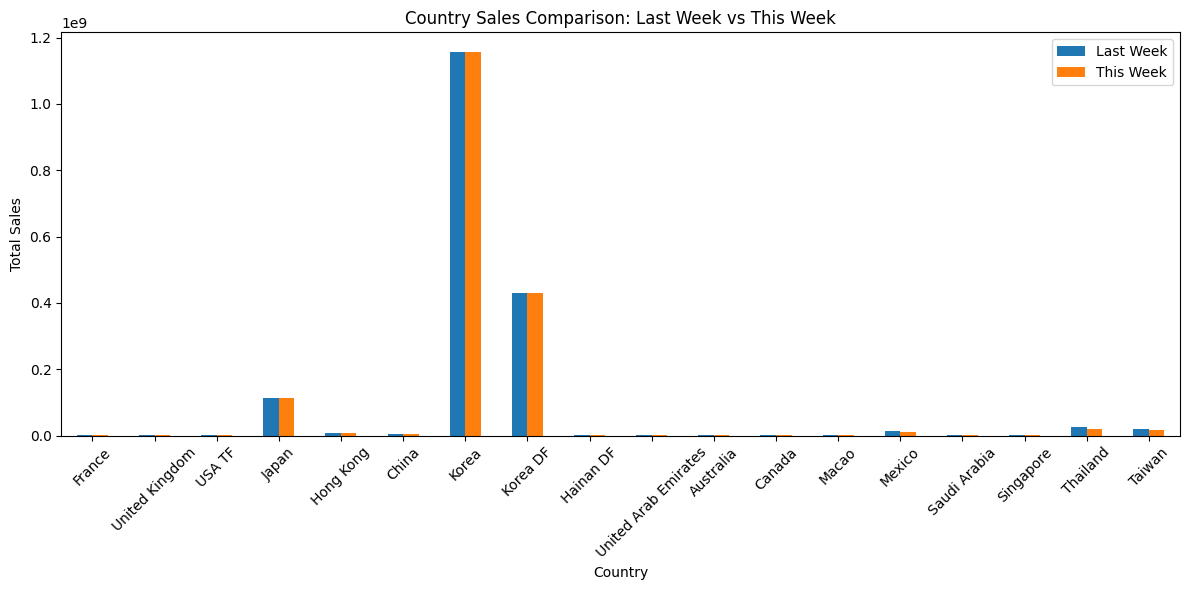

In [126]:


# Calculate total sales for each country (columns)
last_week_totals = grouped_w1_data.sum()
this_week_totals = grouped_w_data.sum()

# Combine the totals into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Last Week': last_week_totals,
    'This Week': this_week_totals
})

# Plot a grouped bar chart
comparison_df.plot(kind='bar', figsize=(12, 6), title='Country Sales Comparison: Last Week vs This Week')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


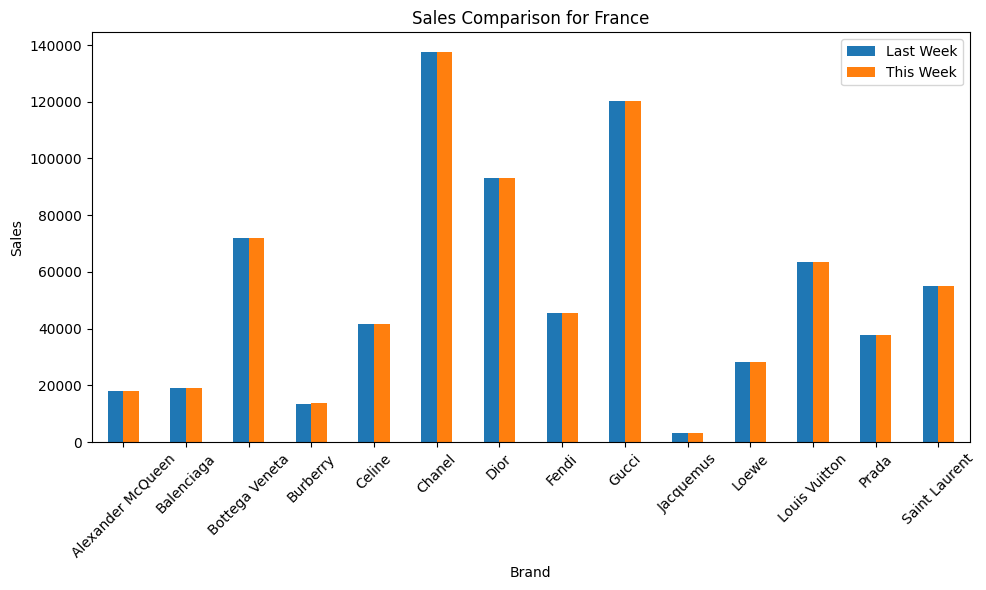

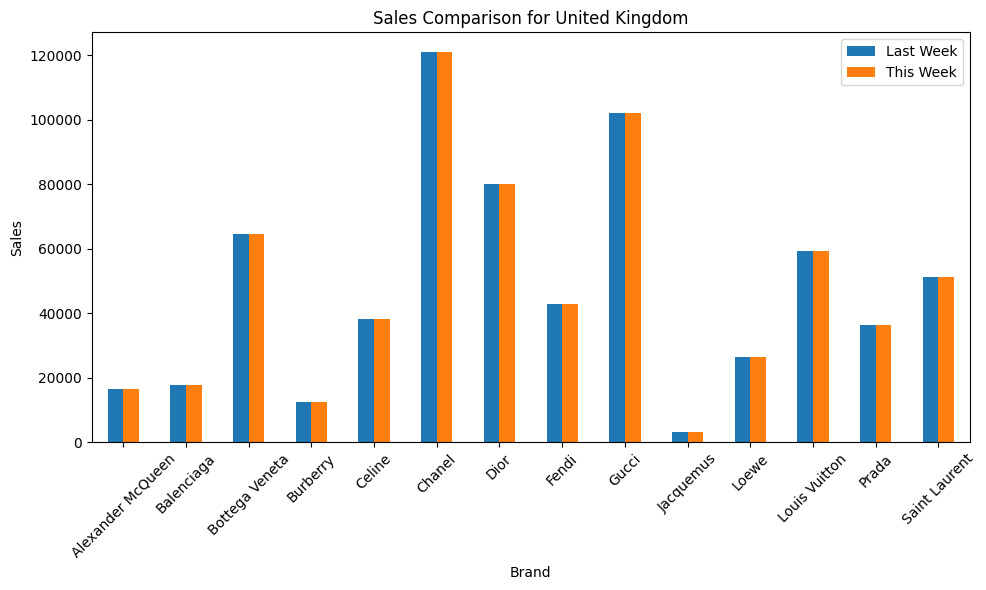

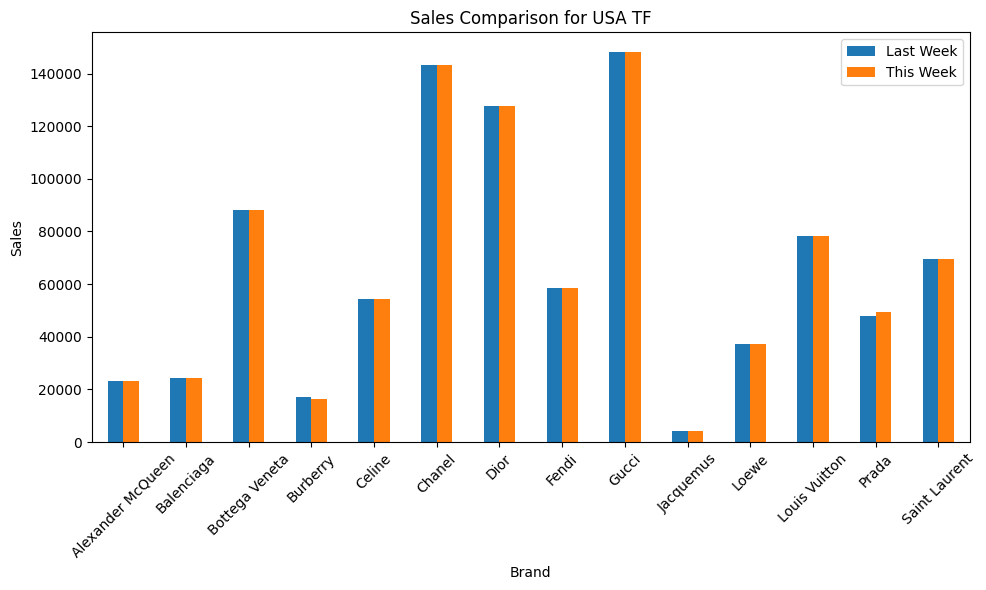

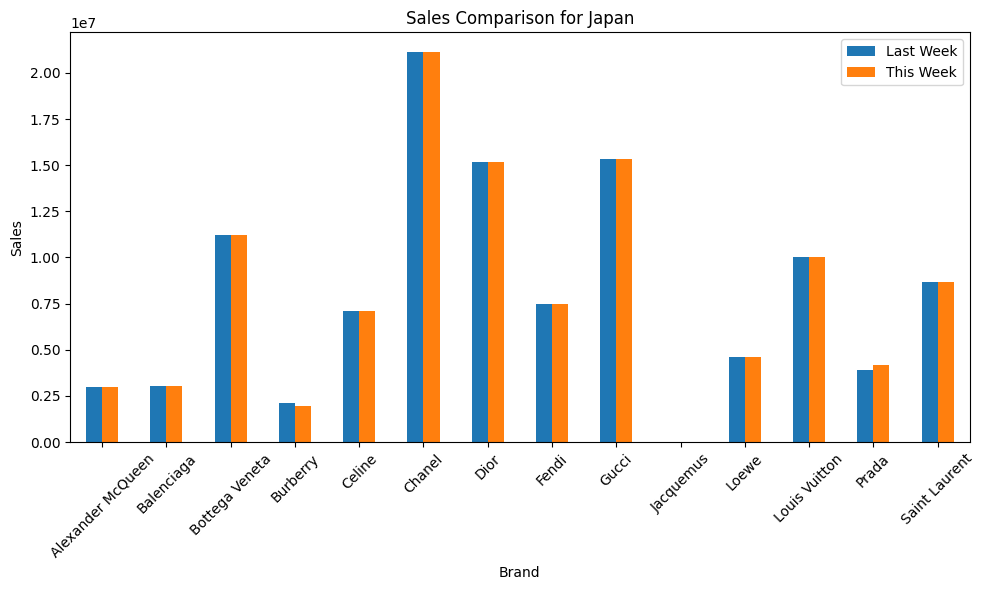

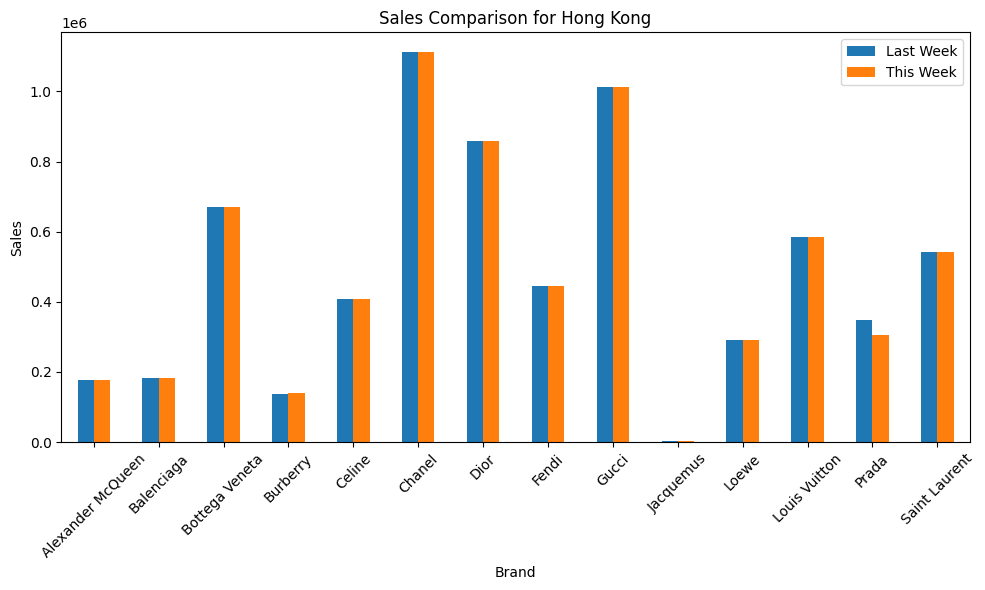

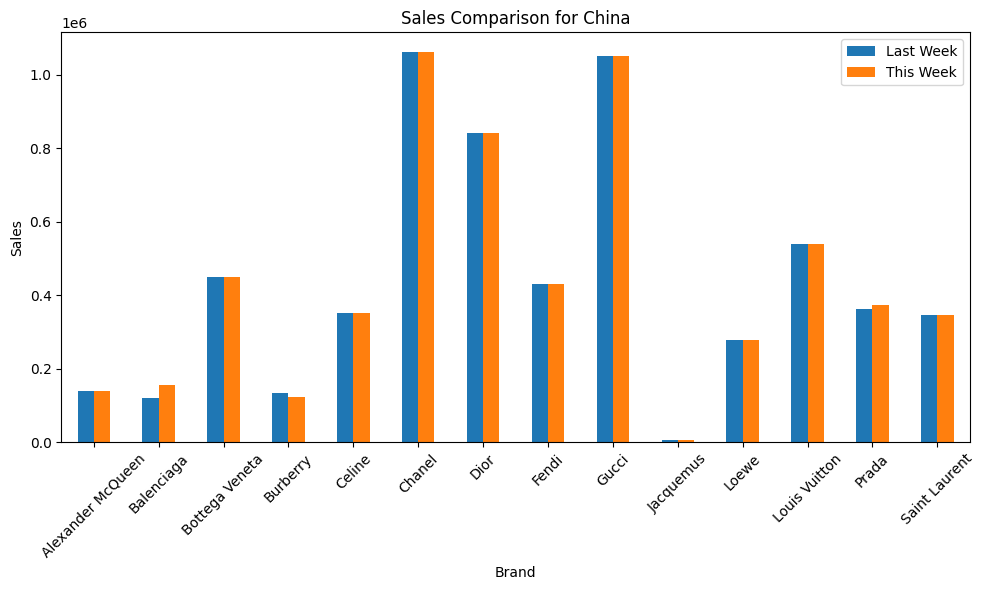

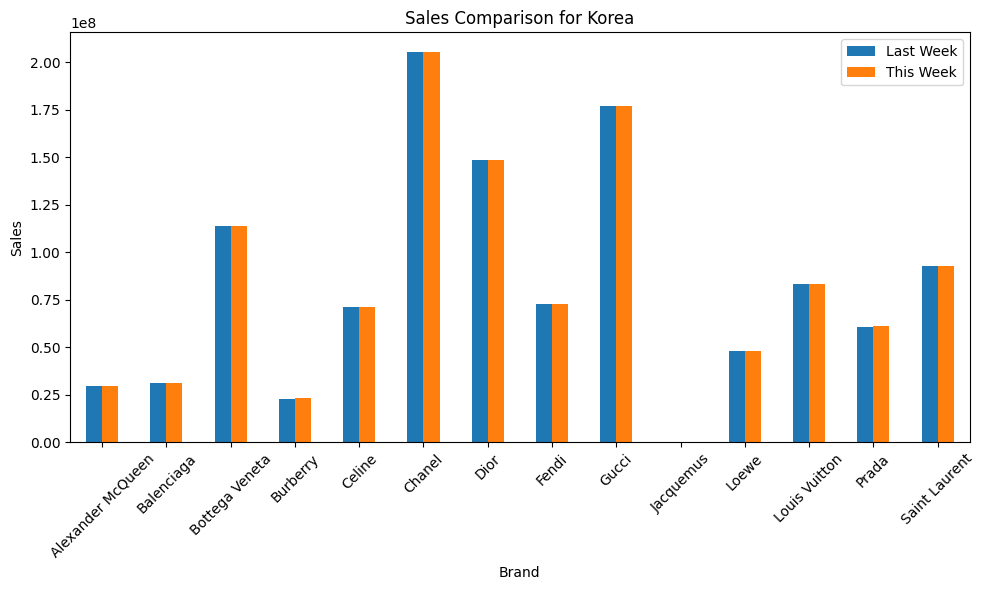

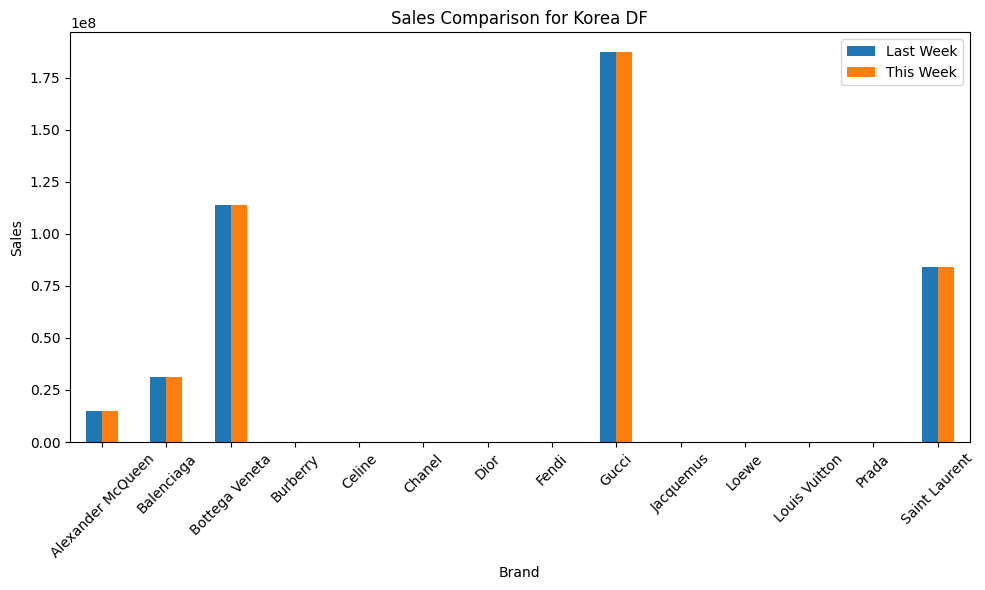

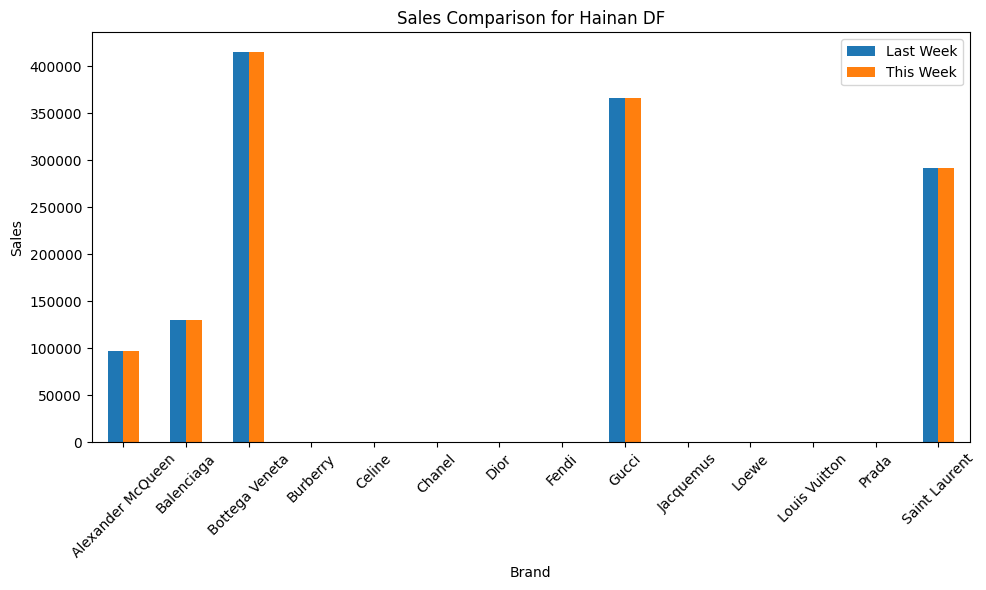

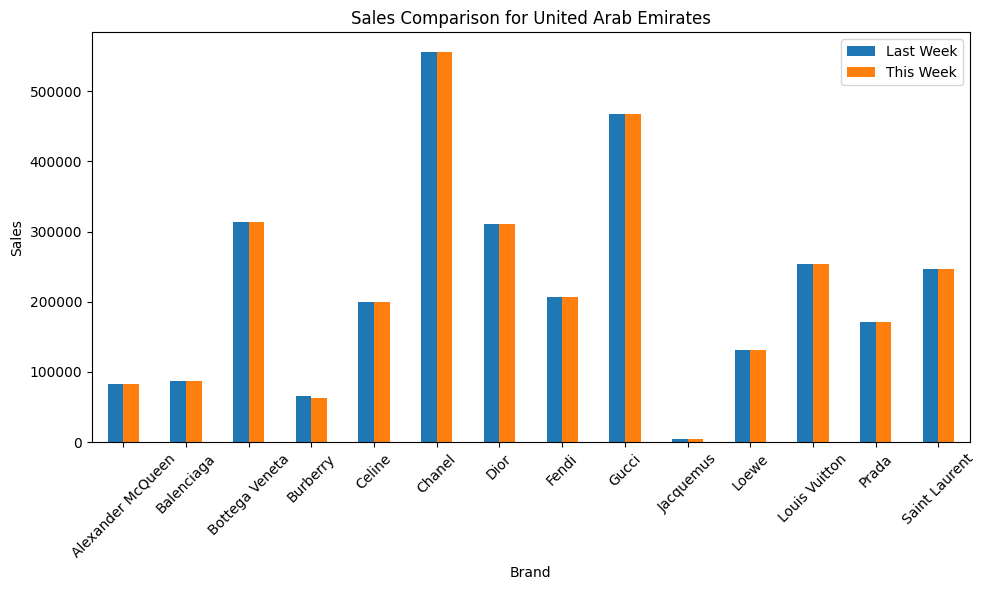

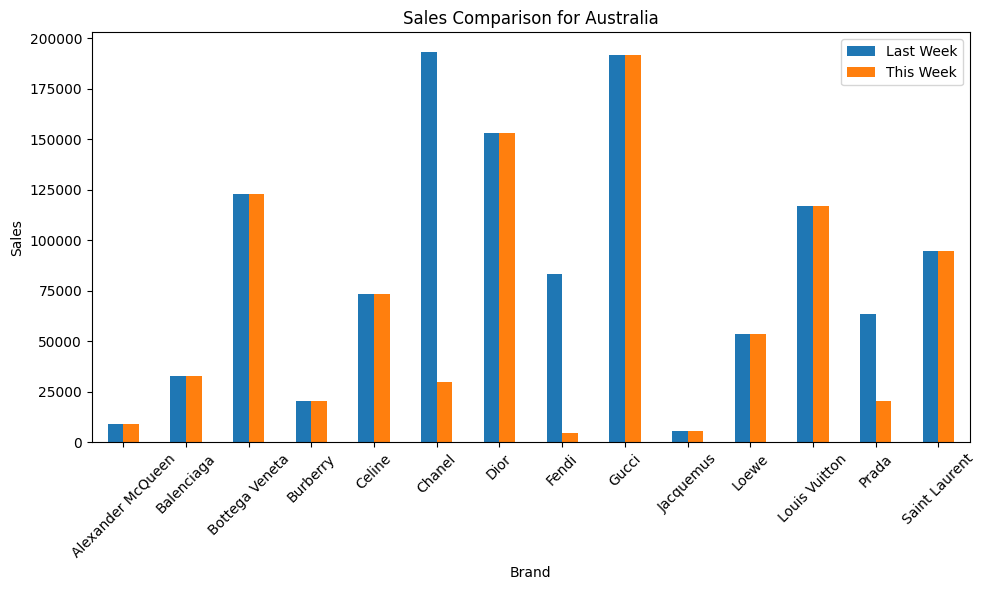

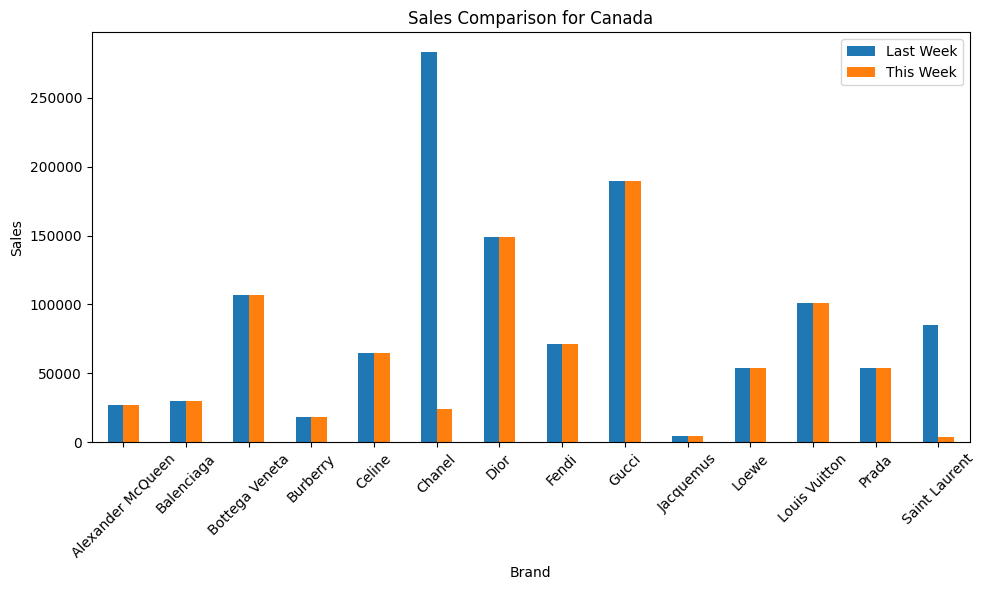

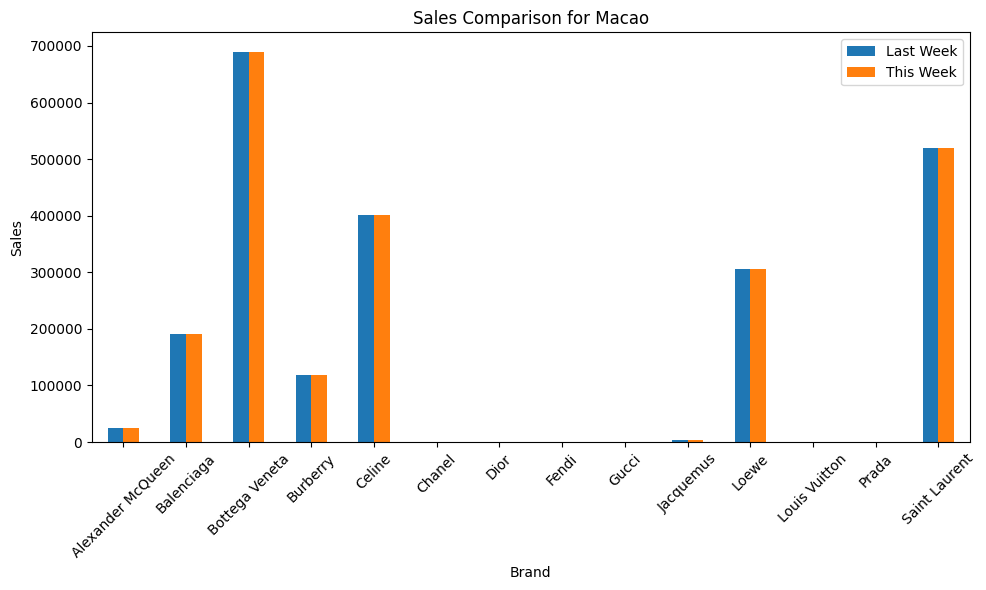

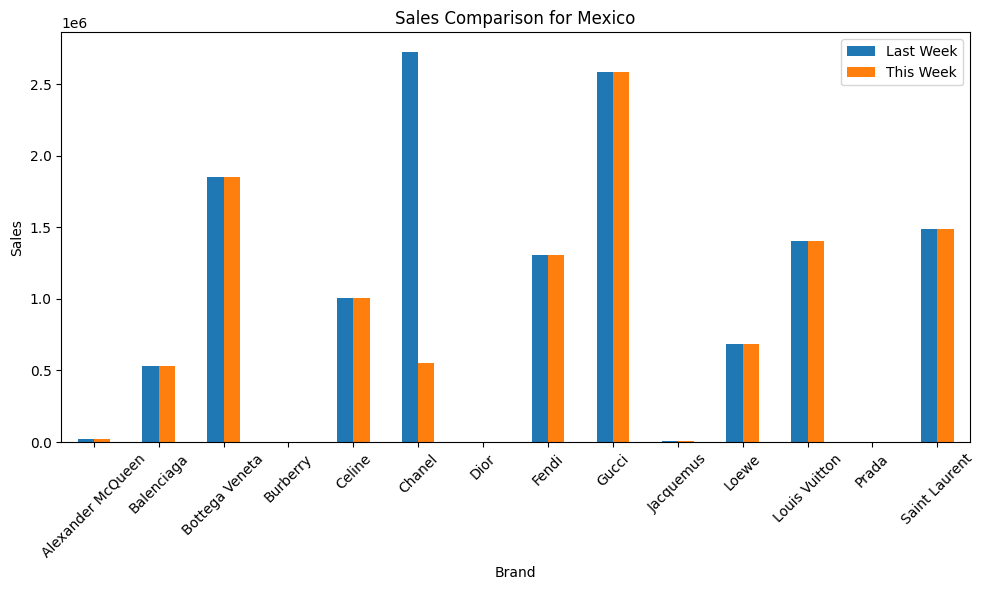

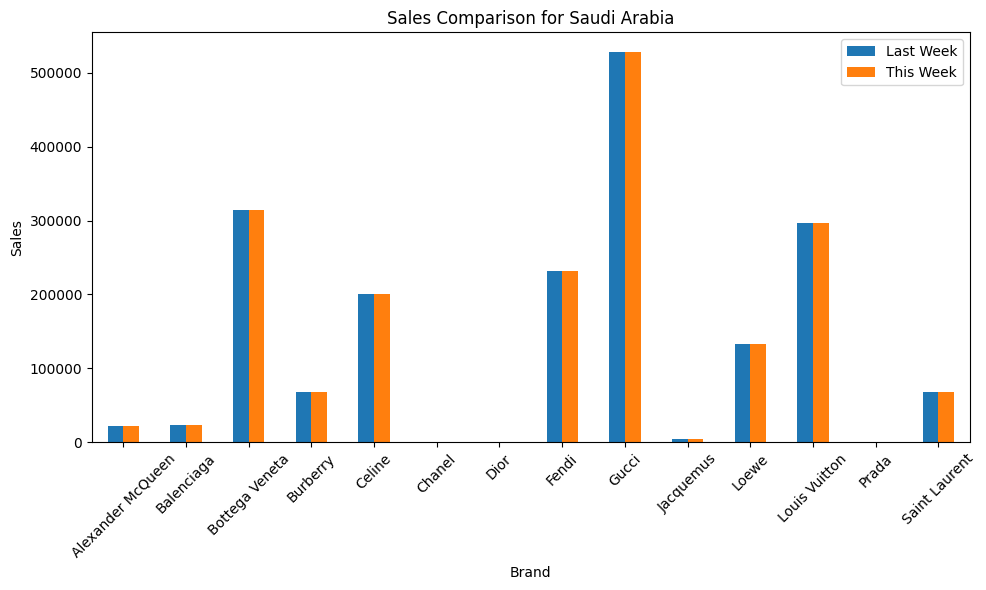

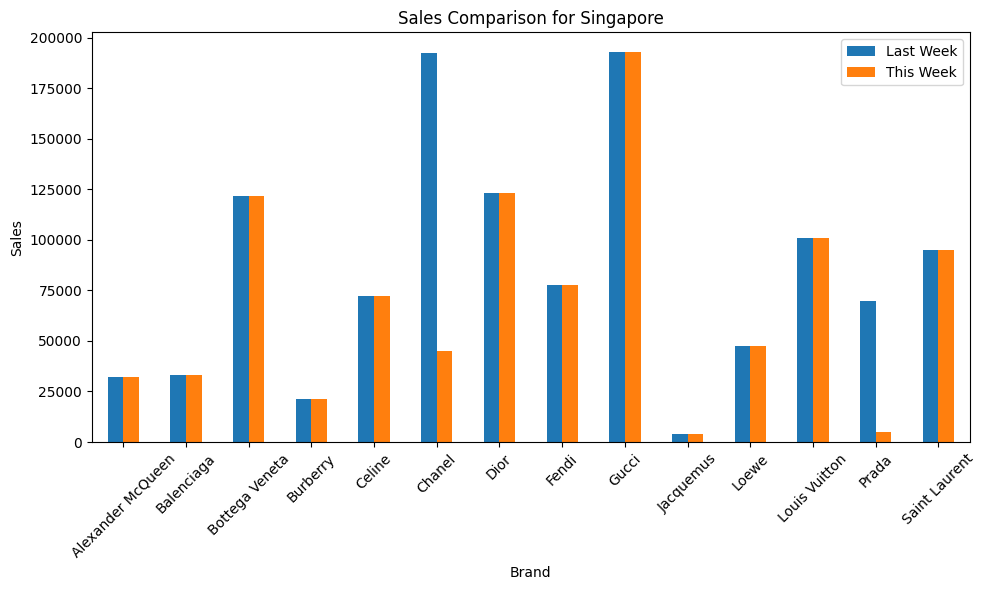

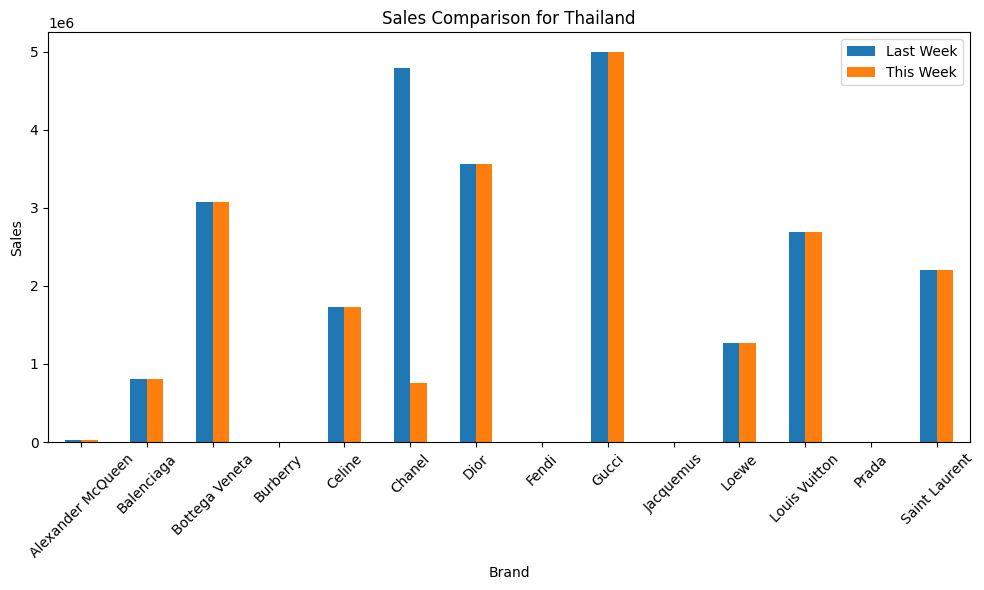

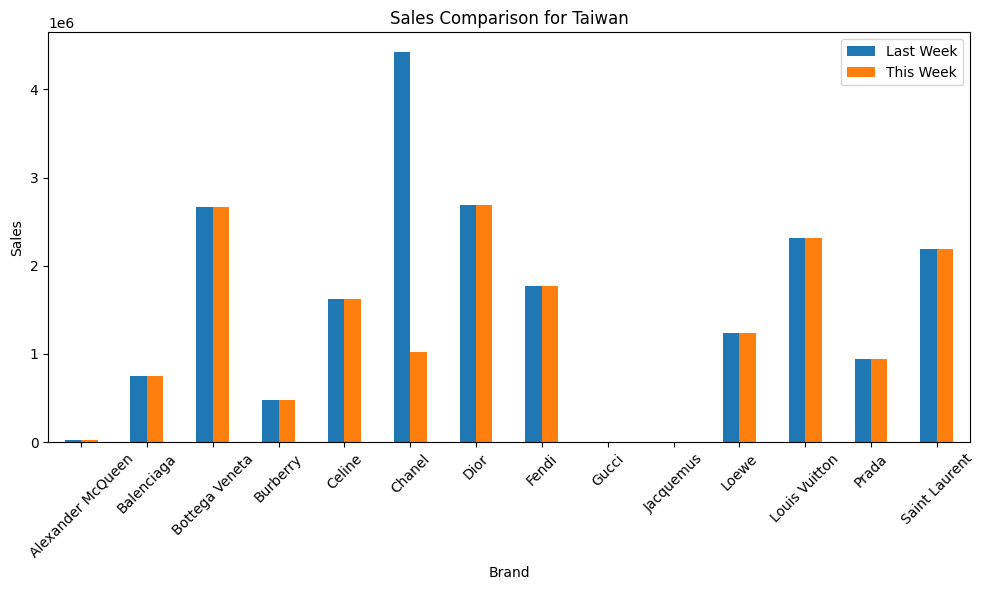

In [127]:


# Loop through each country (column)
for country in grouped_w1_data.columns:
    # Get sales data for last week and this week for the country
    last_week_sales = grouped_w1_data[country]
    this_week_sales = grouped_w_data[country]

    # Create a DataFrame for plotting
    country_df = pd.DataFrame({
        'Last Week': last_week_sales,
        'This Week': this_week_sales
    })

    # Plot the comparison for the country
    country_df.plot(kind='bar', figsize=(10, 6), title=f'Sales Comparison for {country}')
    plt.ylabel('Sales')
    plt.xlabel('Brand')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


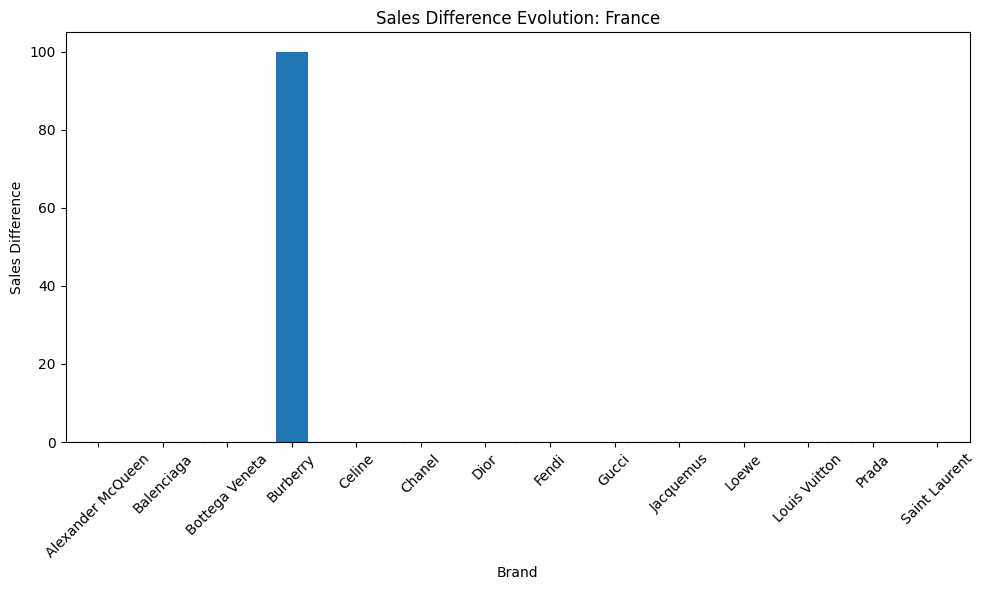

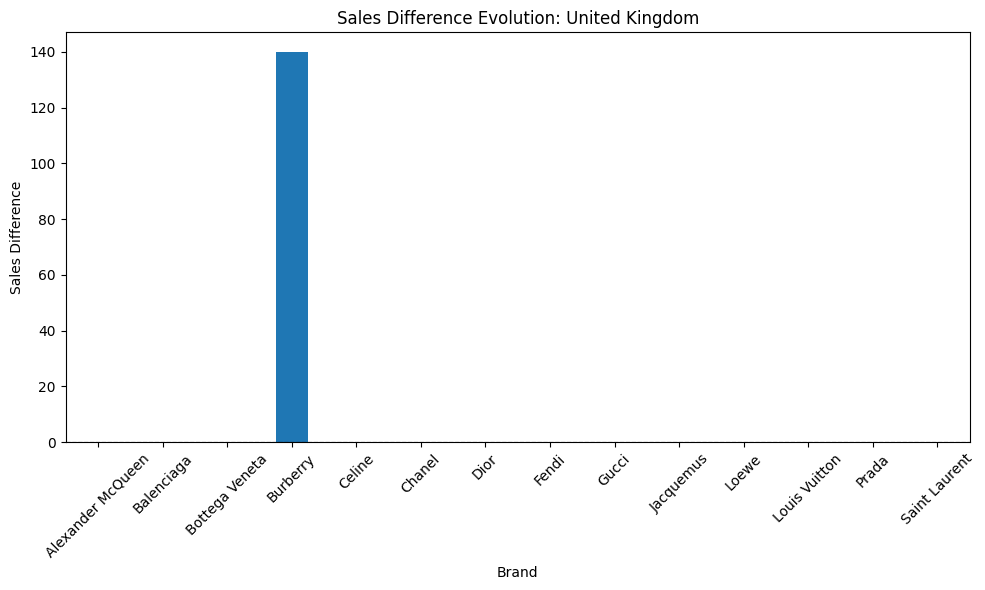

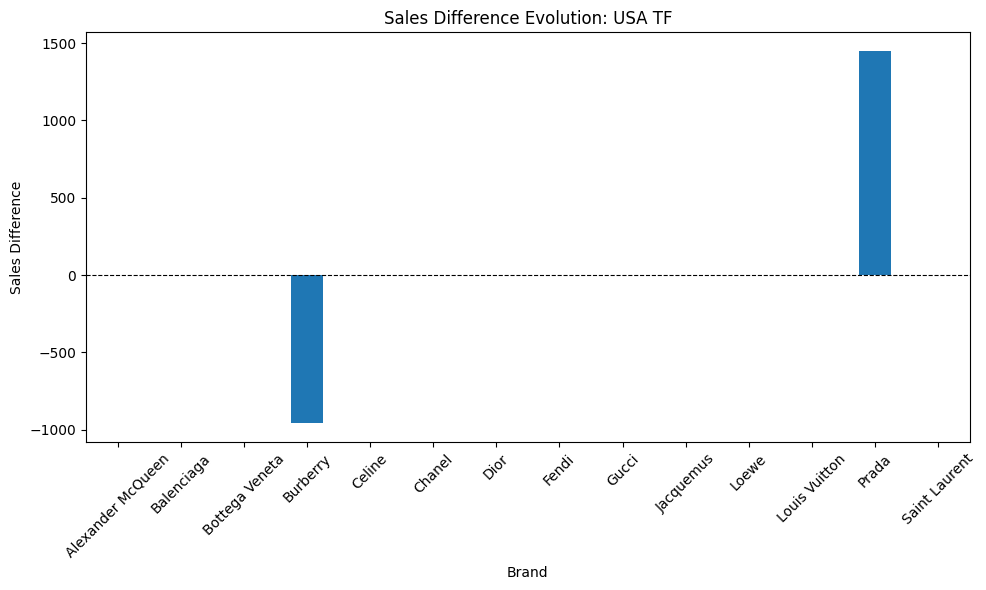

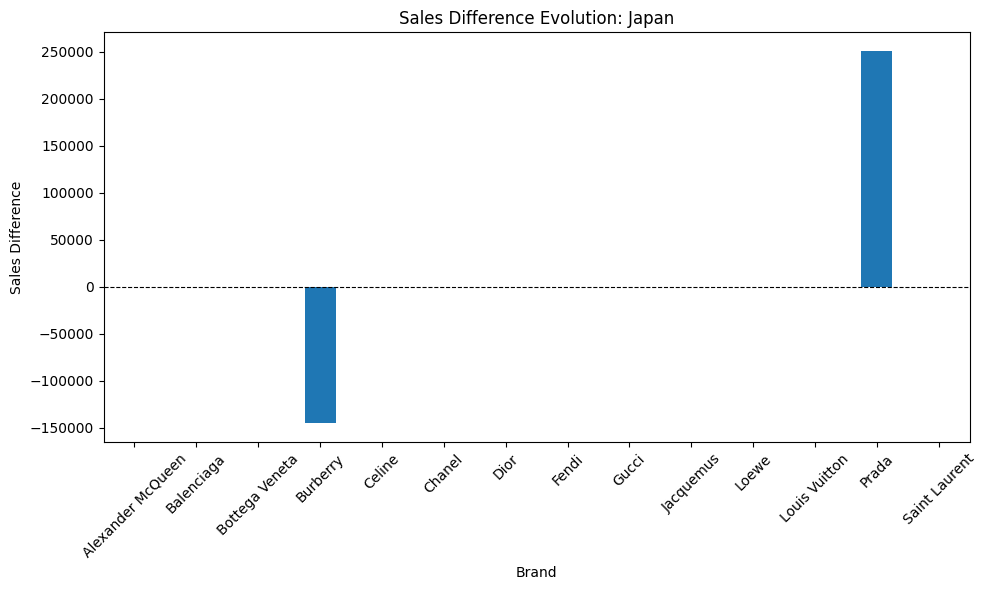

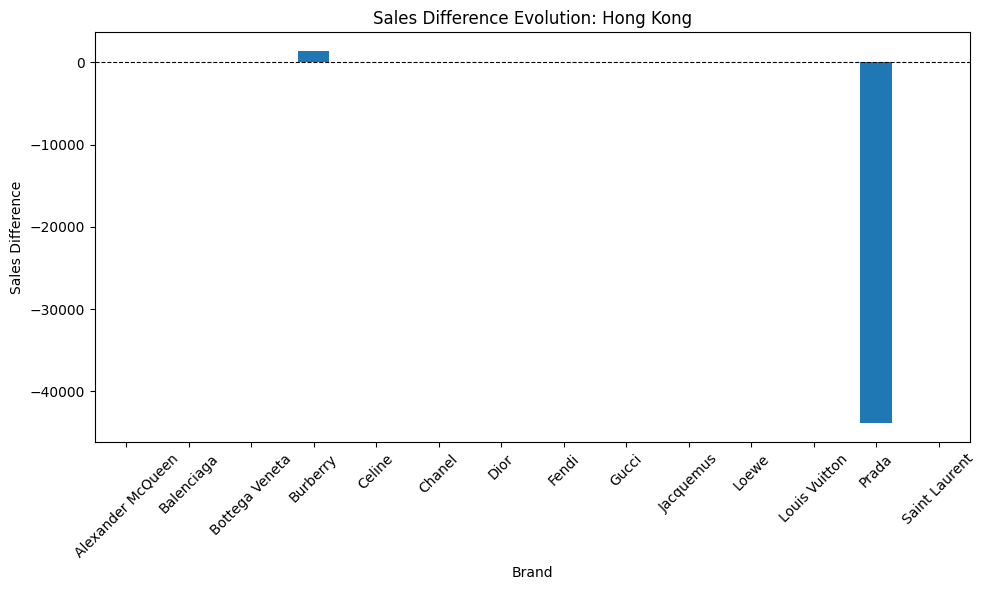

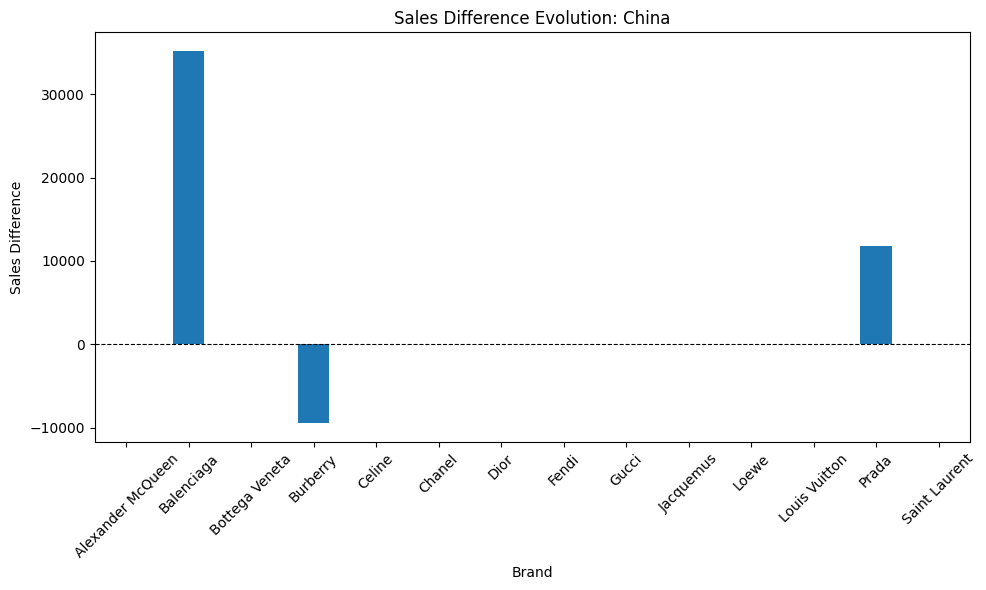

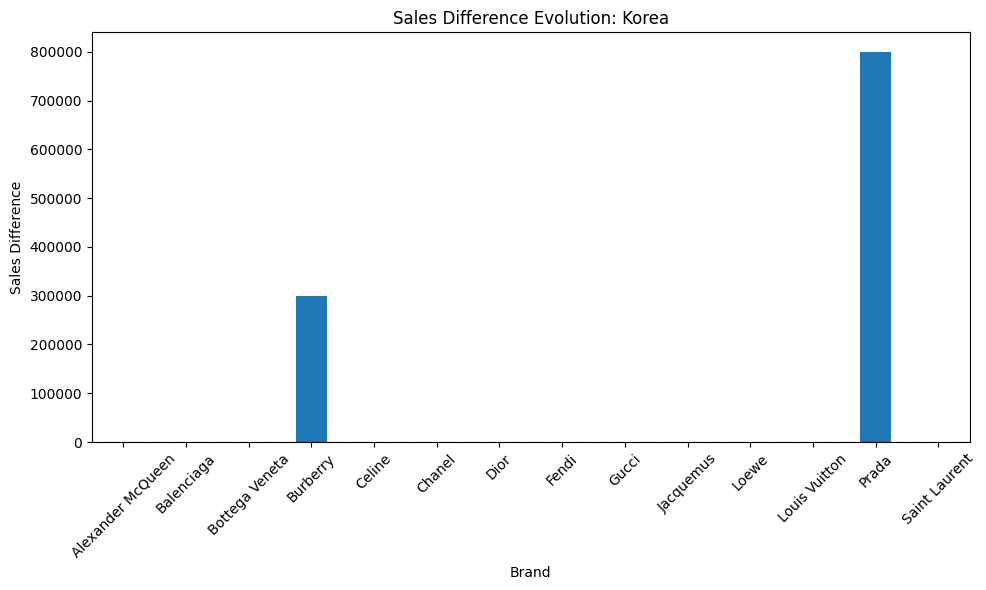

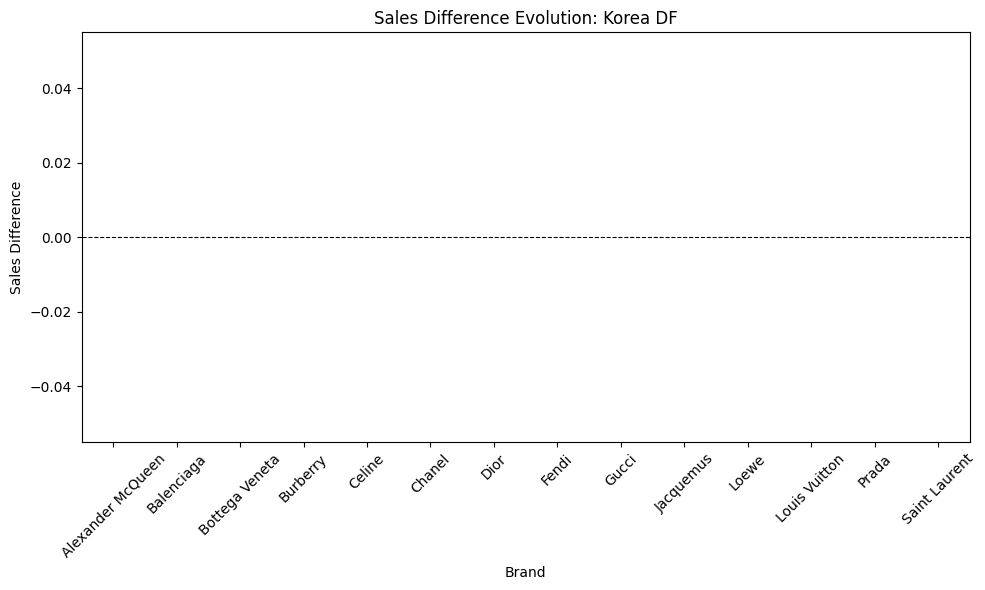

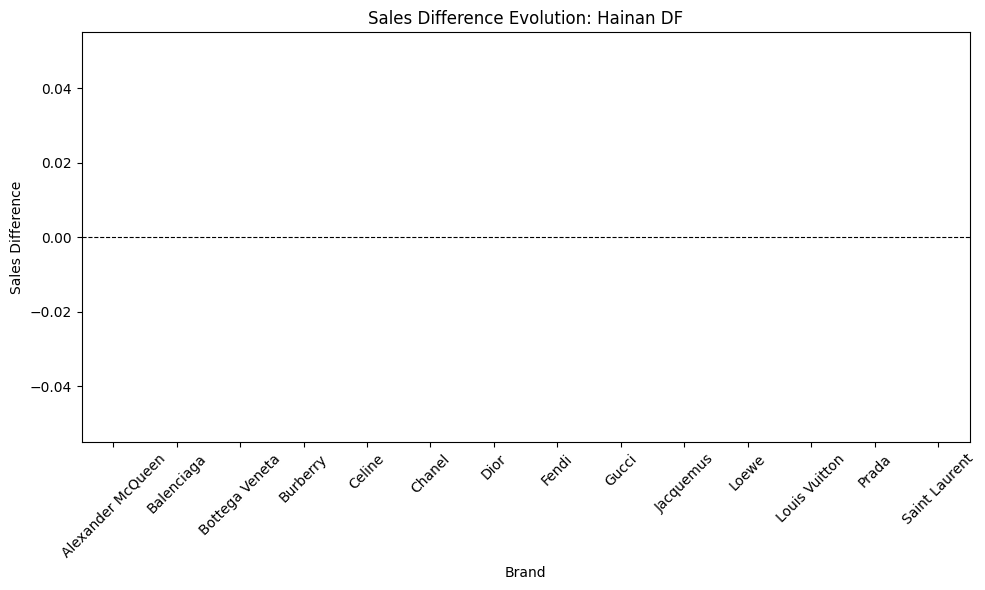

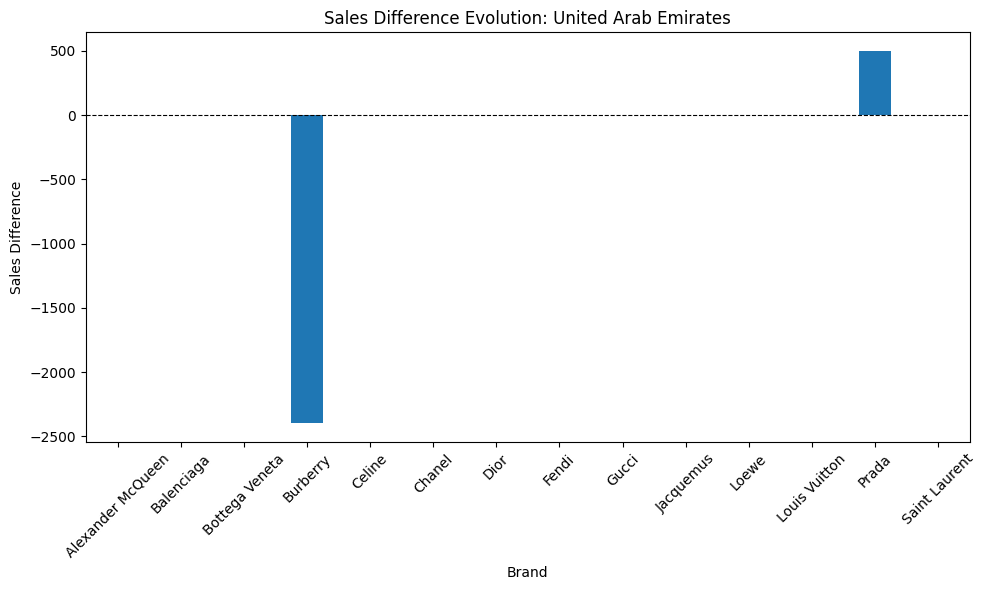

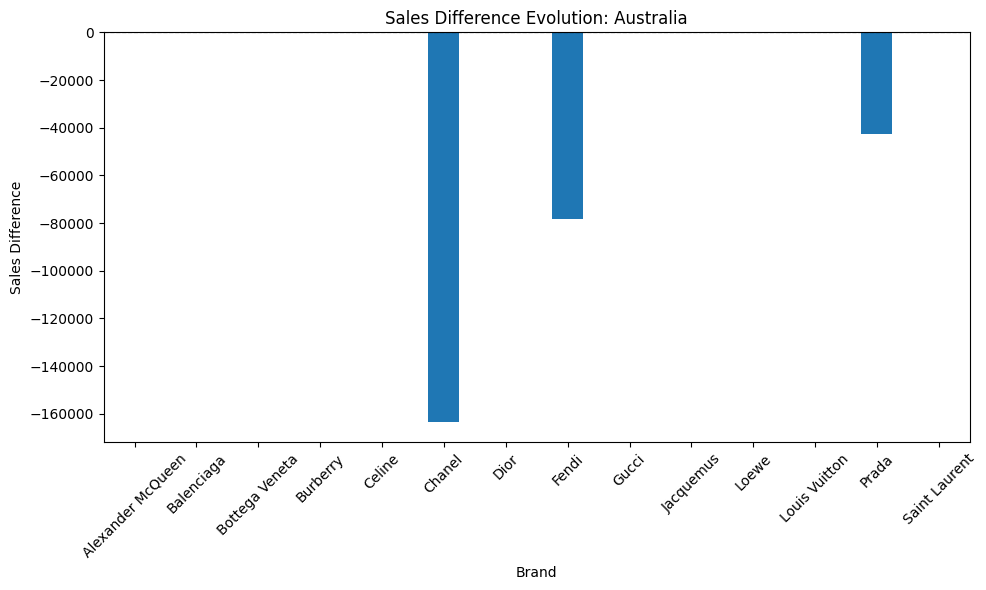

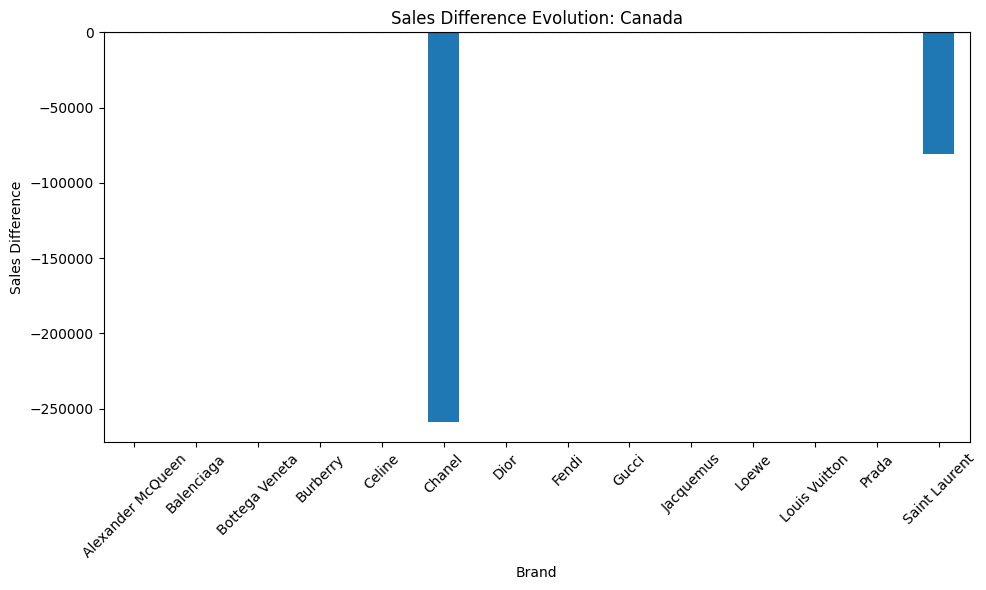

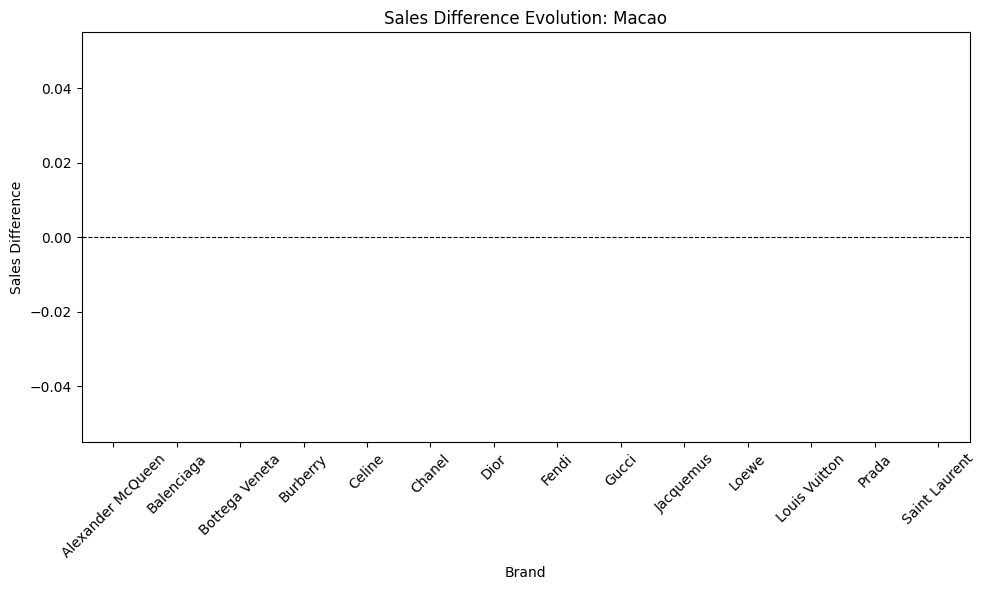

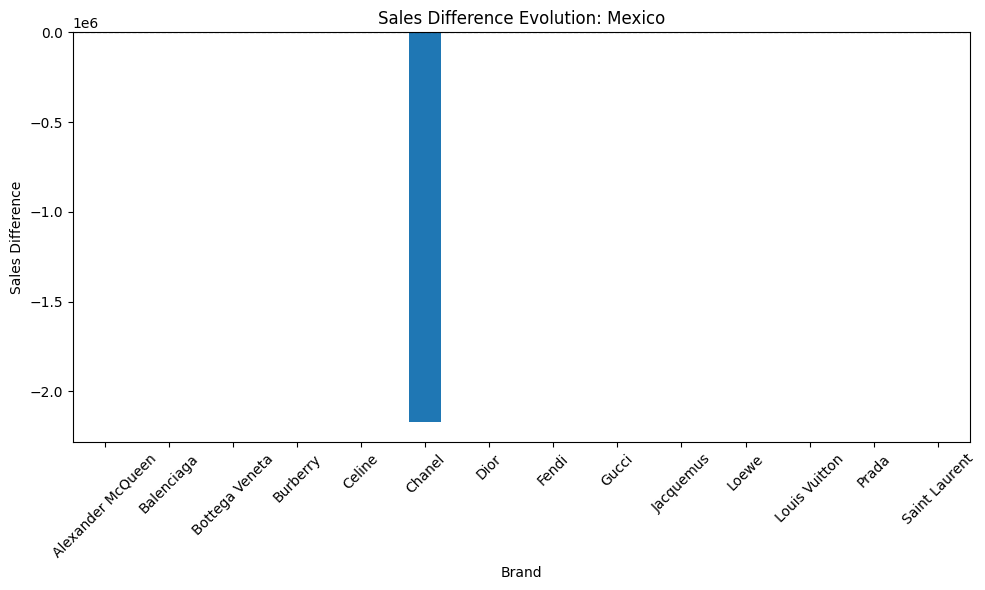

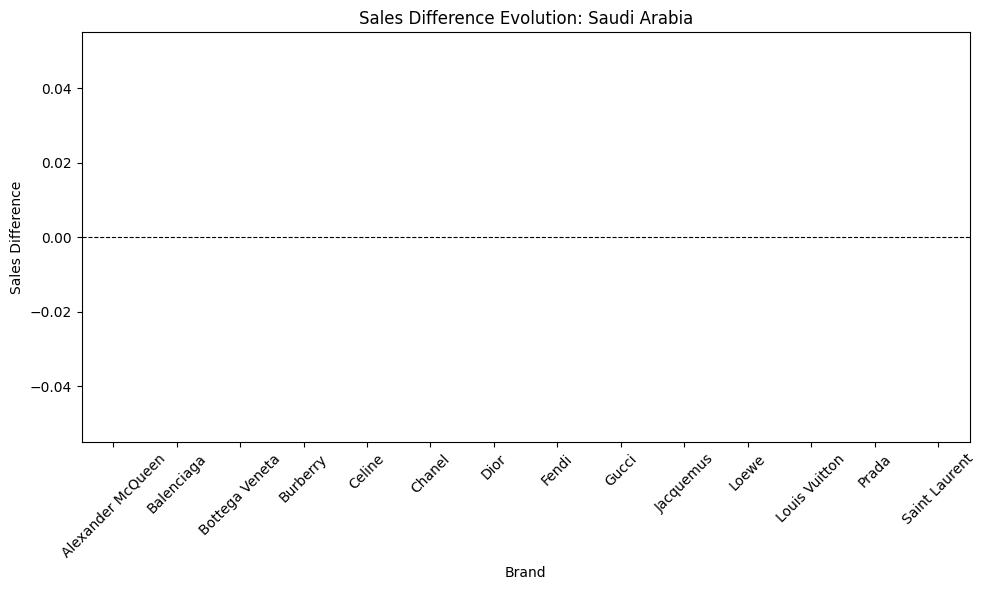

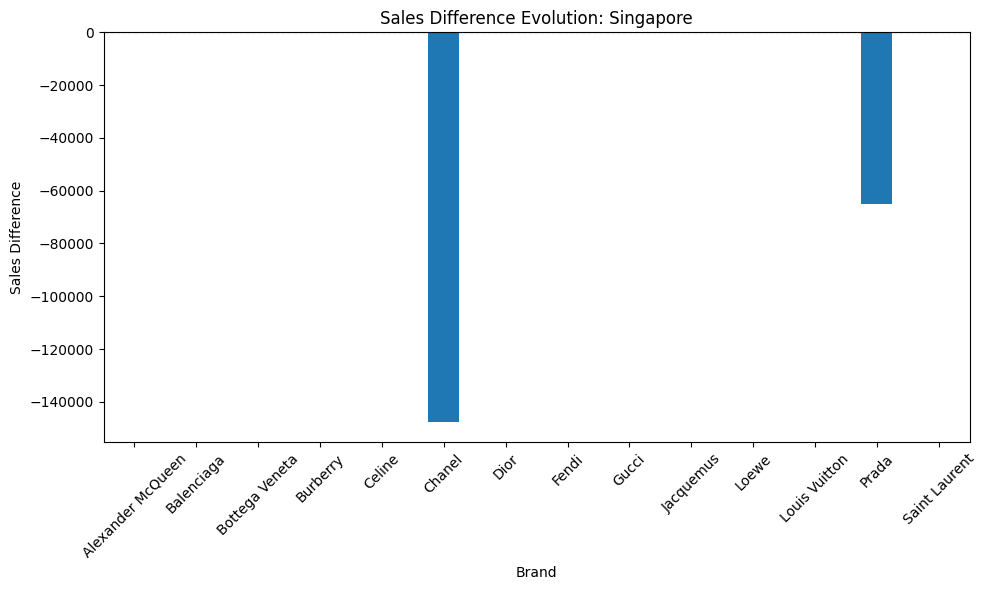

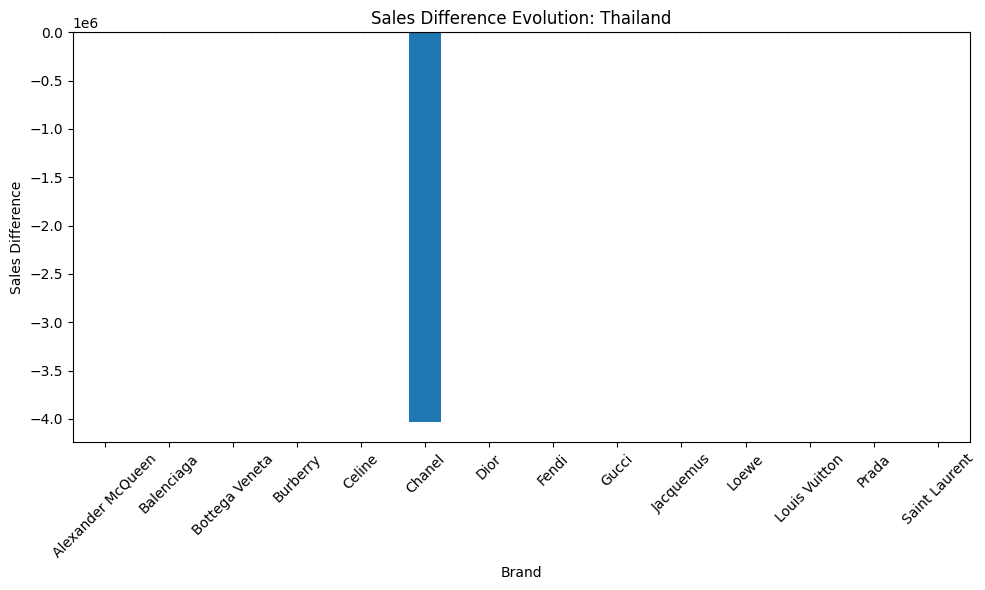

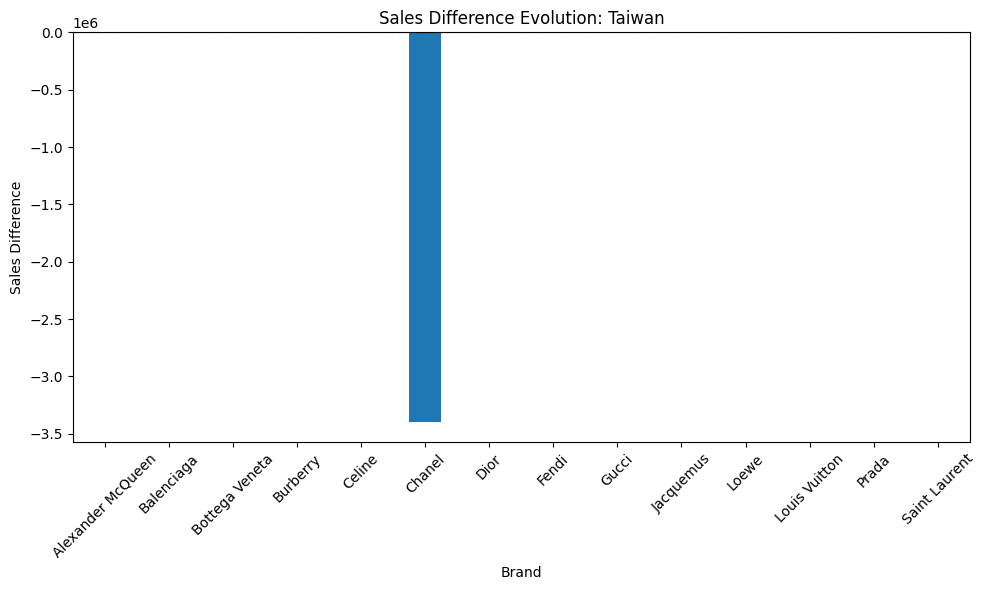

In [128]:

# Calculate the difference in sales for each country (this week - last week)
sales_difference = grouped_w_data - grouped_w1_data

# Plot sales evolution for each country
for country in sales_difference.columns:
    plt.figure(figsize=(10, 6))

    # Plot the sales difference for the country
    sales_difference[country].plot(kind='bar', title=f'Sales Difference Evolution: {country}')

    # Add labels and formatting
    plt.ylabel('Sales Difference')
    plt.xlabel('Brand')
    plt.xticks(rotation=45)
    plt.axhline(0, color='black', linewidth=0.8, linestyle='--')  # Add a baseline at 0
    plt.tight_layout()
    plt.show()


Top 5 Countries by Sales Last Week:
              Last Week     This Week
Korea     1.157064e+09  1.158164e+09
Korea DF  4.314700e+08  4.314700e+08
Japan     1.128091e+08  1.129147e+08
Thailand  2.516694e+07  2.113044e+07
Taiwan    2.111564e+07  1.771364e+07


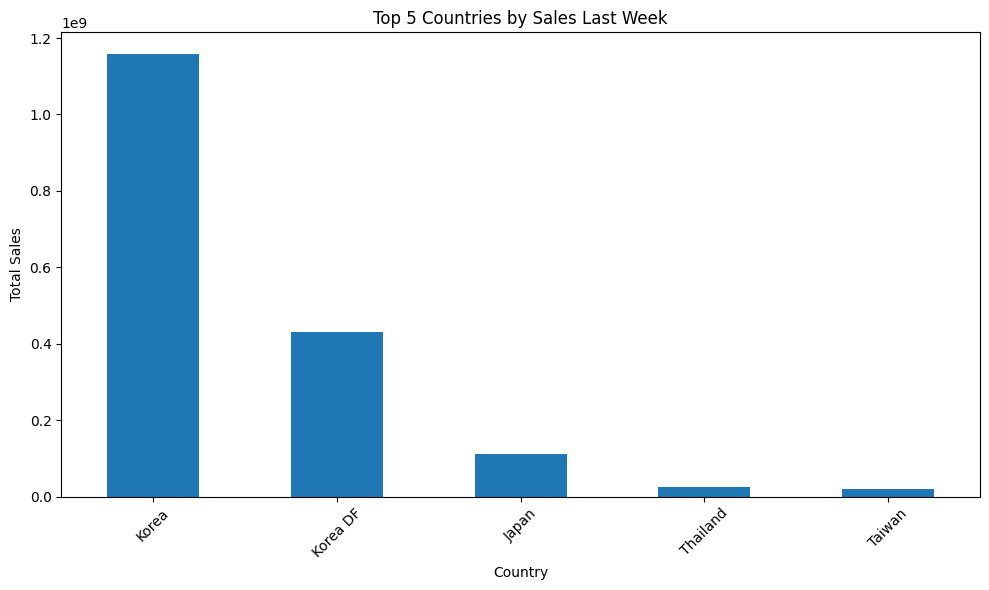

In [129]:
# Get the top 5 countries with the most sales last week
top5_countries_last_week = last_week_totals.nlargest(5)

# Create a DataFrame for visualization
top5_last_week = pd.DataFrame({
    'Last Week': top5_countries_last_week,
    'This Week': this_week_totals[top5_countries_last_week.index]
})

# Print the result
print("Top 5 Countries by Sales Last Week:\n", top5_last_week)

# Plot the top 5 countries by sales last week
top5_last_week['Last Week'].plot(kind='bar', figsize=(10, 6), title='Top 5 Countries by Sales Last Week')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Countries by Sales This Week:
              Last Week     This Week
Korea     1.157064e+09  1.158164e+09
Korea DF  4.314700e+08  4.314700e+08
Japan     1.128091e+08  1.129147e+08
Thailand  2.516694e+07  2.113044e+07
Taiwan    2.111564e+07  1.771364e+07


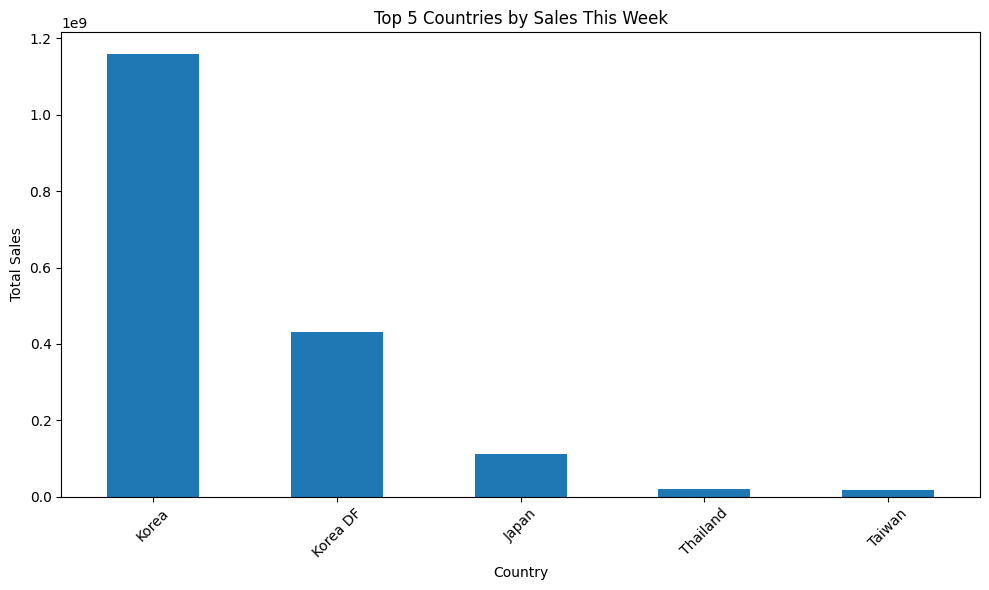

In [130]:
# Get the top 5 countries with the most sales this week
top5_countries_this_week = this_week_totals.nlargest(5)

# Create a DataFrame for visualization
top5_this_week = pd.DataFrame({
    'Last Week': last_week_totals[top5_countries_this_week.index],
    'This Week': top5_countries_this_week
})

# Print the result
print("Top 5 Countries by Sales This Week:\n", top5_this_week)

# Plot the top 5 countries by sales this week
top5_this_week['This Week'].plot(kind='bar', figsize=(10, 6), title='Top 5 Countries by Sales This Week')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Brands by Sales Last Week:
                 Last Week Sales
Brand                          
Gucci               391665655.0
Bottega Veneta      249940090.0
Chanel              242468310.0
Saint Laurent       193449709.0
Dior                172805450.0


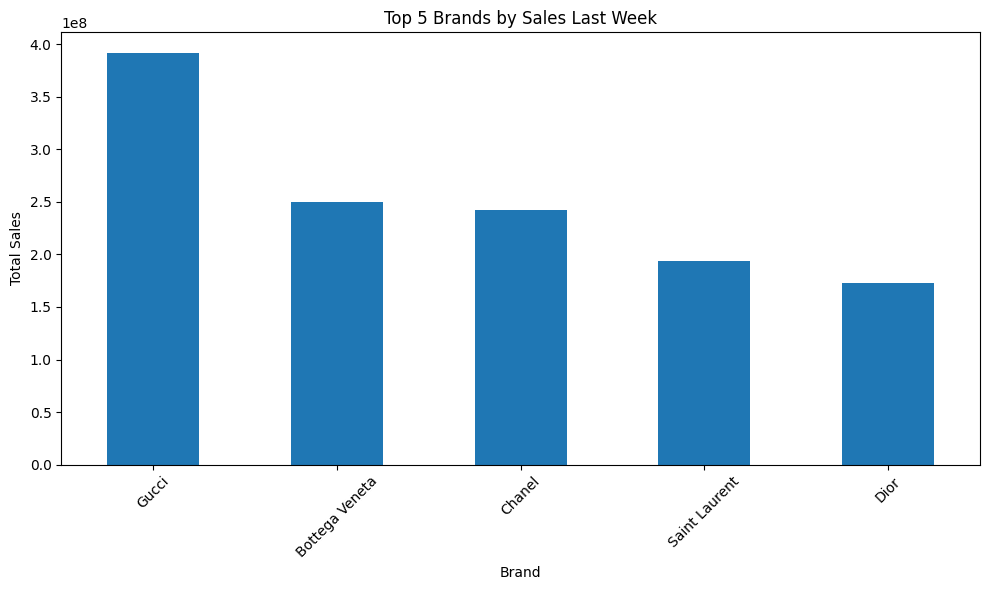

In [131]:
# Get the top 5 brands with the most sales last week
top5_brands_last_week = grouped_w1_data.sum(axis=1).nlargest(5)

# Create a DataFrame for visualization
top5_brands_last_week_df = pd.DataFrame({
    'Last Week Sales': top5_brands_last_week
})

# Print the result
print("Top 5 Brands by Sales Last Week:\n", top5_brands_last_week_df)

# Plot the top 5 brands by sales last week
top5_brands_last_week.plot(kind='bar', figsize=(10, 6), title='Top 5 Brands by Sales Last Week')
plt.ylabel('Total Sales')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top 5 Brands by Sales This Week:
                 This Week Sales
Brand                          
Gucci               391665655.0
Bottega Veneta      249940090.0
Chanel              232285760.0
Saint Laurent       193368849.0
Dior                172805450.0


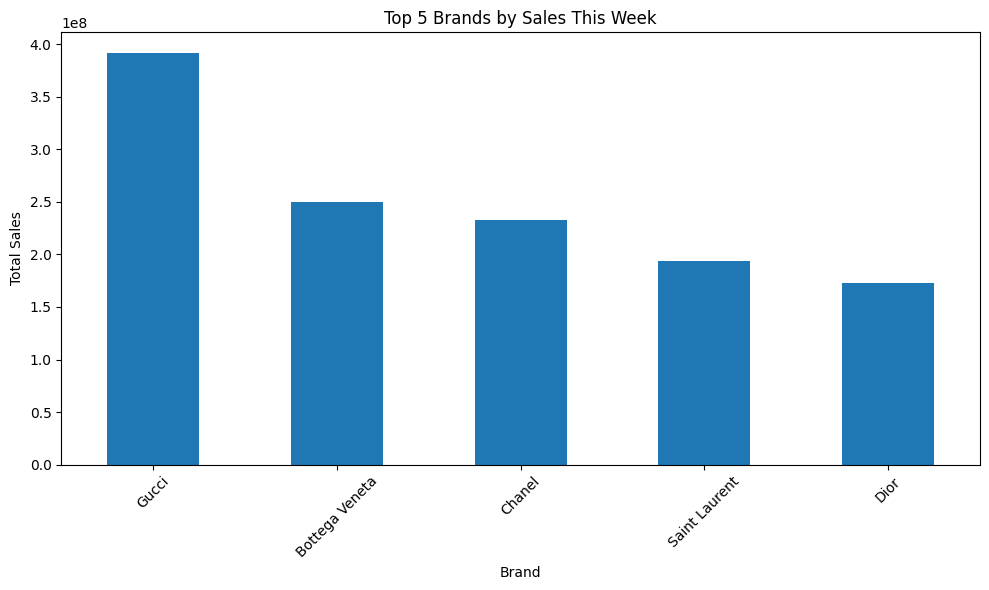

In [132]:
# Get the top 5 brands with the most sales this week
top5_brands_this_week = grouped_w_data.sum(axis=1).nlargest(5)

# Create a DataFrame for visualization
top5_brands_this_week_df = pd.DataFrame({
    'This Week Sales': top5_brands_this_week
})

# Print the result
print("Top 5 Brands by Sales This Week:\n", top5_brands_this_week_df)

# Plot the top 5 brands by sales this week
top5_brands_this_week.plot(kind='bar', figsize=(10, 6), title='Top 5 Brands by Sales This Week')
plt.ylabel('Total Sales')
plt.xlabel('Brand')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
